### Writing a Tree using a struct 

In [1]:
import ROOT

Welcome to JupyROOT 6.08/06


In [17]:
from ROOT import TH1D, gDirectory
%jsroot on

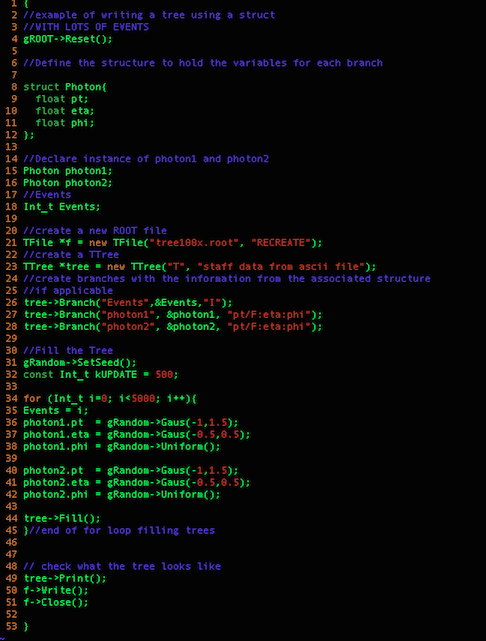

In [3]:
from IPython.display import Image
Image("tree_code.png", width=600, height=10)

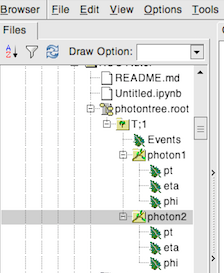

In [4]:
Image("tree_struct.png", width=300, height=100)

In [5]:
myFile = ROOT.TFile("tree100x.root")
ROOT.gDirectory.cd("")

True

In [6]:
events = ROOT.gROOT.FindObject("T")
#events.Print()

In [7]:
tree=myFile.Get("T")
tree.Print()

******************************************************************************
*Tree    :T         : staff data from ascii file                             *
*Entries :     5000 : Total =          142435 bytes  File  Size =     119703 *
*        :          : Tree compression factor =   1.18                       *
******************************************************************************
*Br    0 :Events    : Float_t I                                              *
*Entries :     5000 : Total  Size=      20531 bytes  File Size  =       7080 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.83     *
*............................................................................*
*Br    1 :photon1   : pt/F:eta:phi                                           *
*Entries :     5000 : Total  Size=      60757 bytes  File Size  =      55998 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.07     *
*...................................................

In [8]:
#tree.GetListOfBranches().Print()

In [19]:
mychain = gDirectory.Get('T')
entries = mychain.GetEntriesFast()
hpt = TH1D("pt", "Histogram of pt", 100,10, 10)
heta = TH1D("eta", "Histogram of eta", 100,10, 10)
hphi = TH1D("phi", "Histogram of phi", 100,10, 10)

for events in tree:
    #tree.GetBranch("photon1")
    #pt_val = tree.GetLeaf("photon1.pt")
    #print pt_val
    #hpt.Fill(pt_val)
    pt_val = mychain.pt
    eta_val = mychain.eta
    phi_val = mychain.phi
    
    hpt.Fill(pt_val)
    heta.Fill(eta_val)
    hphi.Fill(phi_val)
   # print pt_val
    

Warning in <TFile::Append>: Replacing existing TH1: pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: phi (Potential memory leak).


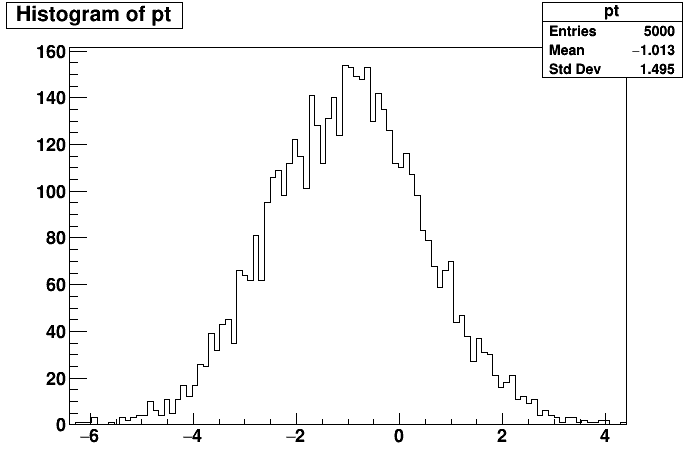

In [14]:
c = ROOT.TCanvas()

#hphi.Draw("same")
hpt.Draw("same")
c.Draw()

In [18]:
dualCanvas = ROOT.TCanvas("DualCanvas","DualCanvas",800,512)
dualCanvas.Divide(3,1)

leftPad = dualCanvas.cd(1)
leftPad.SetLogx()
leftPad.SetLogy()
hphi.Draw("same")
#events.Draw("Photon_Px")


midPad = dualCanvas.cd(2)
midPad.SetLogx()
midPad.SetLogy()
heta.Draw("same")

rightPad = dualCanvas.cd(3)
rightPad.SetLogx()
rightPad.SetLogy()
hpt.Draw("same")

dualCanvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: DualCanvas
